# <center>제3고지 고차 미분 계산</center>

# 25단계 계산 그래프 시각화(1)

Graphviz를 사용하여 계산 그래프 시각화  
  
계산 그래프를 시각화하면 문제가 발생했을 때 원인이 되는 부분을 파악하기 쉬워지고,  
더 나은 계산 방법을 발견할 수도 있으며,  
신경망의 구조를 3자에게 시각적으로 전달하는 용도로도 활용할 수 있음

__Graphvis 설치__

책에서 나온 방법
- macOS는 Homebrew와 MacPorts를 사용하여 설치할 수 있음  
    Homebrew 사용하는 경우 터미널에 다음 명령 실행  
    \$ brew install graphviz  
  
- 우분투 사용하는 경우  
    터미널에 다음 명령 실행  
    \$ sudo apt install praphviz  
  
- 내가 사용한 방법  
    터미널에 다음 명령 실행  
    conda install graphviz  
  
dot -V 를 입력하여 graphviz의 버전이 출력되면 제대로 설치된 것!

__DOT 언어로 그래프 작성하기__  

DOT 언어의 문법  
digraph g{...} 의 구조  
각 노드는 '줄바꿈'으로 구분

In [1]:
with open('sample.dot','w') as f:
    f.write("""
digraph g{
x
y
}""")

터미널에 dot sample.dot -T png -o sample.png  
를 입력하면 이미지가 저장됨  
\* 옵션 -o 다음에 출력 '파일 이름'을 지정하고, 옵션 -T 다음에 출력 파일의 '형식'을 지정  
<img src='./img/3/sample_1.png'>  
  
dot 파일에서 변환된 이미지

__노드에 속성 지정하기__

In [2]:
with open('sample.dot', 'w') as f:
    f.write("""
digraph g{
1 [label="x", color=orange, style=filled]
2 [label="y", color=orange, style=filled]
}
""")

위와 같이 각 줄에는 노드 하나의 정보가 담김  
1과 2와 같이 각 줄의 숫자는 노드의 ID를 나타냄(노드 ID는 0이상의 정수이며, 중복되지 않아야 함)  
해당 ID의 노드에 부여할 속성은 대괄호 []안에 적음  
- label : 노드 안에 표시할 문자
- color : 노드 색
- style=filled : 노드 안쪽을 색칠함  
  
<img src='./img/3/sample_2.png'>  


In [3]:
# ID 3에 하늘색 사각형 노드 추가

with open('sample.dot', 'w') as f:
    f.write("""
digraph g{
1 [label="x", color=orange, style=filled]
2 [label="y", color=orange, style=filled]
3 [label="Exp", color=lightblue, style=filled, shape=box]
}
""")

<img src='./img/3/sample_3.png'>  


__노드 연결하기__  
  
두 노드의 ID를 '->'로 연결하면 노드가 연결됨

In [4]:
# 노드 연결

with open('sample.dot', 'w') as f:
    f.write("""
digraph g{
1 [label="x", color=orange, style=filled]
2 [label="y", color=orange, style=filled]
3 [label="Exp", color=lightblue, style=filled, shape=box]
1 -> 3
3 -> 2
}
""")

<img src='./img/3/sample_4.png'>  


# 26단계 계산 그래프 시각화(2)

### DeZero 계산 그래프를 DOT 언어로 변환

계산 그래프를 시각화하는 함수를 get_dot_graph라는 이름으로 dezero/utils.py에 구현  

~~~python
# get_dot_graph 함수 사용 방법

import numpy as np
from dezero import Variable
from dezero.utils import get_dot_graph

x0 = Variable(np.array(1.0))
x1 = Variable(np.array(1.0))
y = x0 + x1 # 어떤 계산

# 변수 이름 지정
x0.name = 'x0'
x1.name = 'x1'
y.name = 'y'

txt = get_dot_graph(y, verbose=False)
print(txt)

# dot 파일로 저장
with open('sample.dot', 'w') as f:
    o.write(txt)
~~~

__계산 그래프 시각화의 흐름__  
  
get_dot_graph 함수에는 최종 출력인 변수 y를 인수로 제공  
출력 변수 y를 기점으로 한 계산 과정을 DOT 언어로 전환한 문자열을 반환함  
계산 그래프를 시각화할 때 변수 노드에 레이블(이름)을 달아주기 위해 get_dot_graph 함수를 호출하기 전에 Variable 인스턴스의 속성에 name을 추가  
  
출력 결과를 sample.dot에 저장한 후  
터미널에서 dot sample.dot -T png -o sample.png 명령을 실행하면 계산 그래프를 얻을 수 있음

### 계산 그래프에서 DOT 언어로 변환하기
  
__\_dot_var 함수 구현__  
  
Variable 인스턴스의 내용을 DOT 언어로 작성된 문자열로 바꿔서 반환함  

\* 이름 앞에 밑줄(\_)은 이 함수를 로컬 즉, get_dot_graph 함수 전용으로 사용할 것이기 때문에 붙임  
  
Variable 인스턴스의 내용을 DOT 언어로 작성된 문자열로 바꿔서 반환함  
고유한 ID를 부여하기 위해 파이썬 내장 함수인 id를 사용함  
객체 ID는 다른 객체와 중복되지 않기 때문에 노드의 ID로 사용하기에 적합함  
  
\_dot_var 함수의 인수 중 verbose는 True로 설정한 경우 ndarray 인스턴스의 '형상'과 '타입'도 함께 레이블로 출력됨

In [5]:
def _dot_var(v, verbose=False):
    dot_var = '{} [label="{}", color=orange, style=filled]\n'

    name = '' if v.name is None else v.name
    if verbose and v.data is not None:
        if v.name is not None:
            name += ': '
        name += str(v.shape) + ' ' + str(v.dtype)

    return dot_var.format(id(v), name)

In [6]:
# 사용 예
import numpy as np
from dezero import Variable

x = Variable(np.random.randn(2,3))
x.name = 'x'
print(_dot_var(x))
print(_dot_var(x, verbose=True))

140321013610432 [label="x", color=orange, style=filled]

140321013610432 [label="x: (2, 3) float64", color=orange, style=filled]



__\_dot_func 함수 구현__  
  
Dezero 함수를 Dot 언어로 기술  
함수와 입력 변수의 관계와 함수와 출력 변수의 관계도 DOT 언어로 기술

In [7]:
def _dot_func(f):
    dot_func = '{} [label={}, color=gold, style=filled, shape=box]\n'
    txt = dot_func.format(id(f), f.__class__.__name__)
    
    dot_edge = '{} -> {}\n'
    for x in f.inputs:
        txt += dot_edge.format(id(x), id(f))
    for y in f.outputs:
        txt += dot_edge.format(id(f), id(y())) # y는 약한 참조(weakref)
    return txt

In [8]:
# 사용 예
x0 = Variable(np.array(1.0))
x1 = Variable(np.array(1.0))
y = x0 + x1
txt = _dot_func(y.creator)
print(txt)

140320230158192 [label=Add, color=gold, style=filled, shape=box]
140320232522272 -> 140320230158192
140320232524240 -> 140320230158192
140320230158192 -> 140320230156896



__계산 그래프 시각화하는 get_dot_graph 함수 구현__  
  
이 코드의 로직은 Variable 클래스의 backward 메서드와 거의 같음  
여기서는 미분 대신 DOT 언어로 기술한 문자열을 txt에 추가함  
  
또한 실제 역전파에서는 노드를 따라가는 순서가 중요했으나,  
여기선 순서가 문제가 되지 않으므로 generation 값으로 정렬하는 코드가 필요 없음

In [9]:
def get_dot_graph(output, verbose=True):
    txt = ''
    funcs = []
    seen_set = set()
    
    def add_func(f):
        if f not in seen_set:
            funcs.append(f)
            # funcs.sort(key=lambda x: x.generation)
            seen_set.add(f)
            
    add_func(output.creator)
    txt += _dot_var(output, verbose)
    while funcs:
        func = funcs.pop()
        txt += _dot_func(func)
        for x in func.inputs:
            txt += _dot_var(x, verbose)
            
            if x.creator is not None:
                add_func(x.creator)
    return 'digraph g{\n' + txt + '}'

__dot 명령 실행까지 한 번에 해주는 함수 plot_dot_graph 함수 구현__

In [10]:
import os
import subprocess

def plot_dot_graph(output, verbose=True, to_file='graph.png'):
    dot_graph = get_dot_graph(output, verbose)
    
    # 1. dot 데이터를 파일에 저장
    tmp_dir = os.path.join(os.path.expanduser('~'), '.dezero') # expanduser('~') : 절대 경로로 풀어줌
    if not os.path.exists(tmp_dir): # ~/.dezero 디렉터리가 없다면 새로 생성
        os.mkdir(tmp_dir)
    graph_path = os.path.join(tmp_dir, 'tmp_graph.dot')
    
    with open(graph_path, 'w') as f:
        f.write(dot_graph)
        
    # 2. dot 명령 호출
    extension = os.path.splitext(to_file)[1][1:] # 확장자(png, pdf 등)
    cmd = 'dot {} -T {} -o {}'.format(graph_path, extension, to_file)
    subprocess.run(cmd, shell=True)
    
    # Return the image as a Jupyter Image object, to be displayed in-line.
    try:
        from IPython import display
        return display.Image(filename=to_file) # 주피터 노트북 셀에 이미지 출력
    except:
        pass

__동작 확인__  
  
24단계에서 구현한 Goldstein-Price 함수 시각화

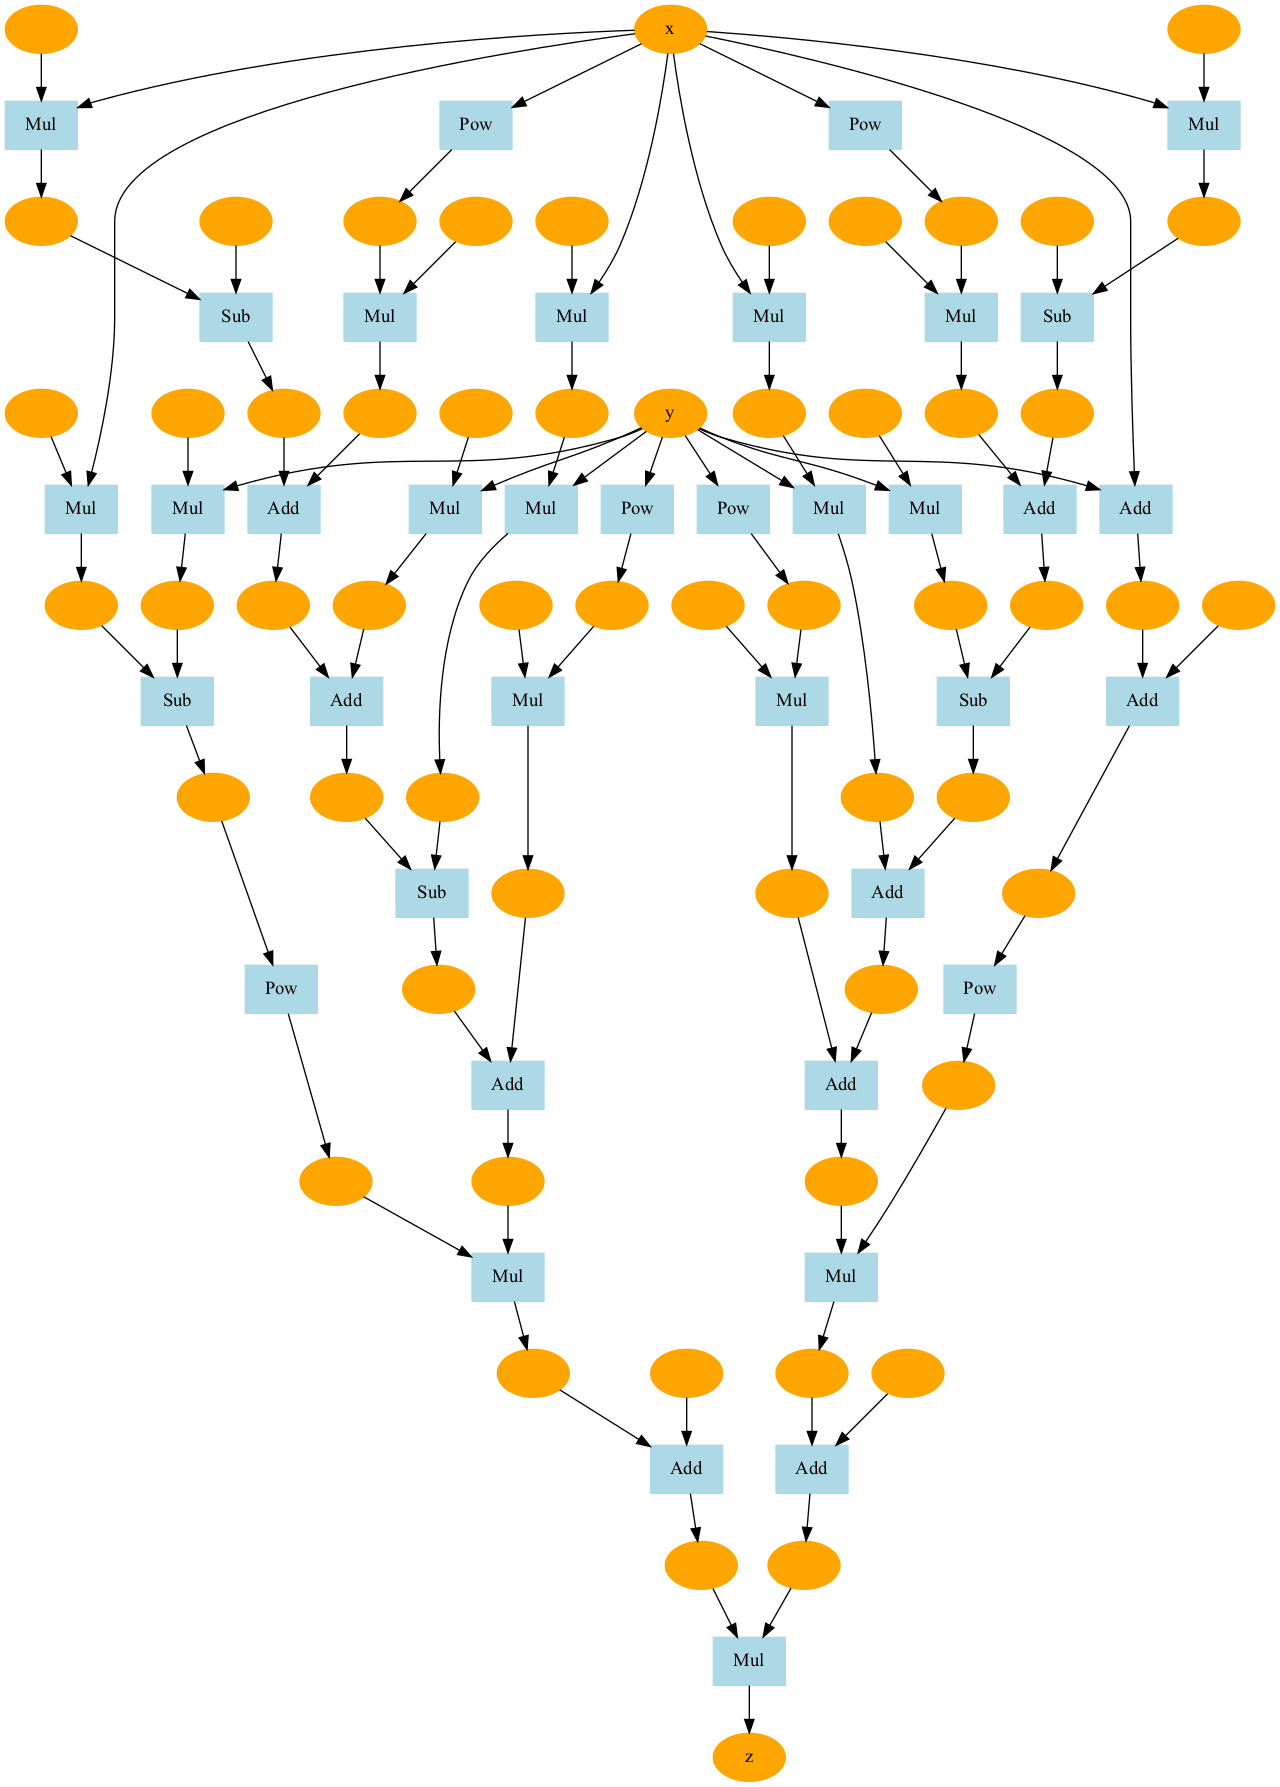

In [11]:
import numpy as np
from dezero import Variable
from dezero.utils import plot_dot_graph

def goldstein(x, y):
    z = (1 + (x + y + 1)**2 * (19 - 14*x + 3*x**2 - 14*y + 6*x*y + 3*y**2))*\
    (30 + (2*x - 3*y)**2 * (18 -32*x + 12*x**2 + 48*y - 36*x*y + 27*y**2))
    return z

x = Variable(np.array(1.0))
y = Variable(np.array(1.0))
z = goldstein(x, y)
z.backward()

x.name = 'x'
y.name = 'y'
z.name = 'z'
plot_dot_graph(z, verbose=False, to_file='goldstein.png')

# 27단계 테일러 급수 미분

__sin 함수 구현__  
  
sin 함수의 미분은 해석적으로 풀 수 있음  
$y=sin(x)$일 때 그 미분은 $\frac{\partial{y}}{\partial{x}}=cos(x)$

In [12]:
import numpy as np
from dezero import Function

class Sin(Function):
    def forward(self, x):
        y = np.sin(x)
        return y
    
    def backward(self, gy):
        x = self.inputs[0].data
        gx = gy * np.cos(x)
        return gx
    
def sin(x):
    return Sin()(x)

In [13]:
# x = 𝜋/4에서 y=sin(x) 미분

from dezero import Variable

x = Variable(np.array(np.pi/4))
y = sin(x)
y.backward()

print(y.data)
print(x.grad)

0.7071067811865475
0.7071067811865476


$sin(\frac{\pi}{4})=cos(\frac{\pi}{4})=\frac{1}{\sqrt{2}}$

__테일러 급수 이론__  
  
테일러 급수(Taylor Series)를 이용한 sin 함수의 미분  
테일러 급수란 어떤 함수를 다항식으로 근사하는 방법으로, 수식은 다음과 같음  
  
점 a(임의의 값)에서 f(x)의 테일러 급수  
  
$f(x) = f(a)+f'(a)(x-a)+\frac{1}{2!}f''(a)(x-a)^2+\frac{1}{3!}f'''(a)(x-a)^3+\cdots$  
  
- $f'$ : 1차 미분, $f''$ : 2차 미분(미분한 값을 한 번 더 미분한 것), $f'''$ : 3차 미분  
  
위와 같이 항이 무한히 계속되지만, 어느 시점에서 중단하면 $f(x)$의 값을 근사할 수 있음  
(항이 많아질수록 근사의 정확도가 높아짐)  
  
매클로린 전개(Maclaurin's series) : $a = 0$일 때의 테일러 급수  
위 식에 $a=0$을 대입하면 다음과 같음  
  
$f(x)=f(0)+f'(0)x+\frac{1}{2!}f''(0)x^2+\frac{1}{3!}f'''(0)x^3+\cdots$  
  
$f'(x)=cos(x), f''(x)=-sin(x), f'''(x)=-cos(x), f''''(x)=sin(x),...$형태가 반복되고, $sin(0)=0, cos(0)=1$이므로 위 식에 $f(x)=sin(x)$를 적용시키면,  다음과 같이 정리할 수 있음  
   
$sin(x)=\frac{x}{1!}-\frac{x^3}{3!}+\frac{x^5}{5!}-\cdots =\sum_{i=0}^\infty(-1)^i\frac{x^{2i+1}}{(2i+1)!}$  
  
여기서 $\sum$의 i가 커질수록 근사 정밀도가 좋아짐  
또한 i가 커질수록 $(-1)^i\frac{x^{2i+1}}{(2i+1)!}$의 절댓값은 작아지므로,  
이 값을 참고하여 i의 값(반복 횟수)를 적절히 결정할 수 있음

__테일러 급수 구현__  
  
threshold로 임계값 지정  
threshold가 작을수록 정밀도가 높아지며, 이 값으로 '계산 그래프의 복잡성'을 제어할 수 있음

In [14]:
import math

def my_sin(x, threshold=0.0001):
    y = 0
    for i in range(100000):
        c = (-1) ** i / math.factorial(2 * i + 1)
        t = c * x ** (2 * i + 1)
        y = y + t
        if abs(t.data) < threshold:
            break
    return y

In [15]:
x = Variable(np.array(np.pi/4))
y = my_sin(x)
y.backward()

print(y.data)
print(x.grad)

0.7071064695751781
0.7071032148228457


이론적으로는 테일러 급수의 임곗값을 작게 할수록 근사 정밀도가 좋아지나,  
컴퓨터가 하는 계산은 '자릿수 누락'이나 '반올림'등이 발생할 수 있어 반드시 이론과 일치하는 것은 아님!

__계산 그래프 시각화__  

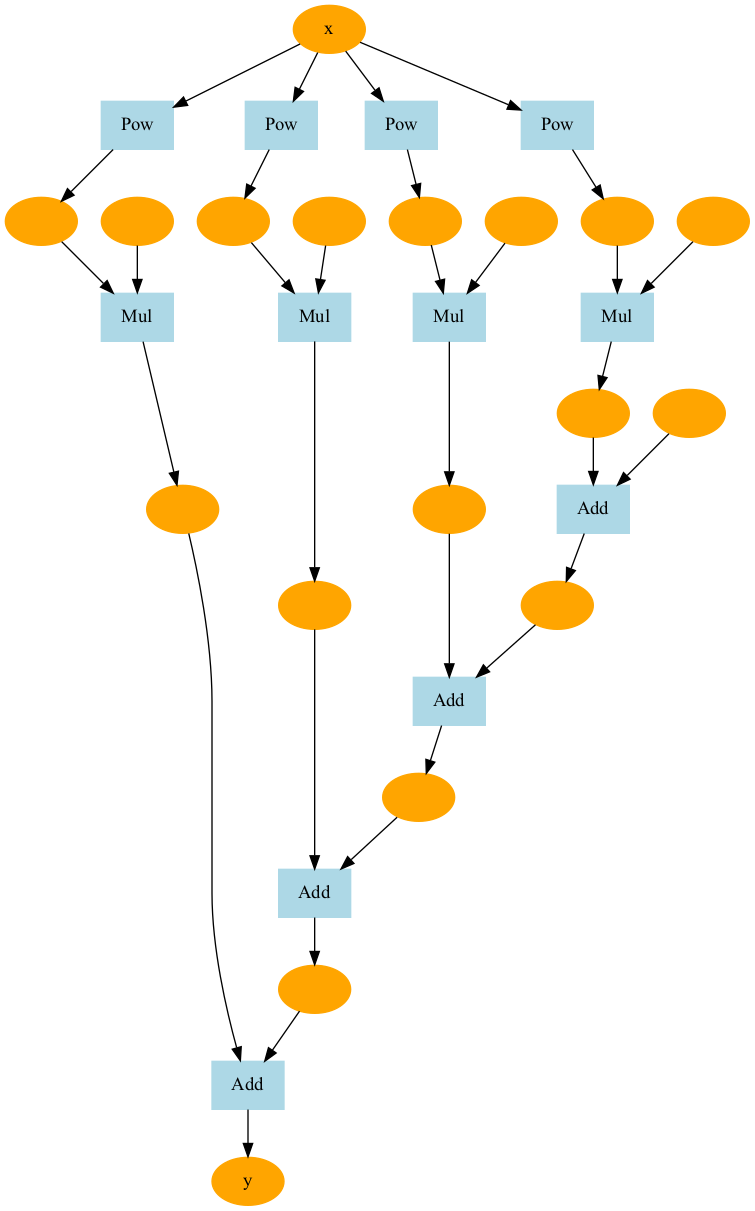

In [16]:
import numpy as np
from dezero import Variable
from dezero.utils import plot_dot_graph

x = Variable(np.array(np.pi/4))
y = my_sin(x)
y.backward()

x.name = 'x'
y.name = 'y'
plot_dot_graph(y, verbose=False, to_file='sin.png')

In [17]:
# threshold를 1e-150으로 설정한 경우 

import numpy as np
from dezero import Variable
from dezero.utils import plot_dot_graph
import math

def my_sin(x, threshold=1e-150):
    y = 0
    for i in range(100000):
        c = (-1) ** i / math.factorial(2 * i + 1)
        t = c * x ** (2 * i + 1)
        y = y + t
        if abs(t.data) < threshold:
            break
    return y

x = Variable(np.array(np.pi/4))
y = my_sin(x)
y.backward()

x.name = 'x'
y.name = 'y'
plot_dot_graph(y, verbose=False, to_file='sin.png')

# 28단계 함수 최적화

최적화란 어떤 함수가 주어졌을 때 그 최솟값(또는 최댓값)을 반환하는 '입력(함수의 인수)'을 찾는 일  
신경망 학습의 목표도 손실 함수의 출력을 최소화하는 매개변수를 찾는 것이니 최적화 문제에 속함  
Dezero는 미분을 자동으로 계산할 수 있으므로,  
자동 미분의 활용 중 가장 중요한 용도인 함수 최적화 해보기!

__로젠브록 함수(Rosenbrock function)__  
  
$f(x_0, x_1)=b(x_1-x_0^2)^2+(a-x_0)^2$  
  
$a=1, b=100$일 때,  
$y=100(x_1-x_0^2)^2+(1-x_0)^2$  
  
로젠브록 함수(a=1, b=100인 두 번째 식)의 출력이 최소가 되는 지점은 $(x_0, x_1)=(1,1)$  
로젠브록 함수는 최적화 문제의 벤치마크 함수로 자주 사용되며, a=1, b=100으로 설정하여 벤치마크하는 것이 일반적임  
\* 로젠브록 함수는 골짜기로 향하는 기울기에 비해 골짜기 바닥에서 전역 최솟값으로 가는 기울기가 너무 작아서 최적화하기 어렵기 때문에 벤치마크로 자주 쓰임  
  
Dezero를 사용하여 최솟값 지점을 찾아낼 수 있는지 확인

In [18]:
import numpy as np
from dezero import Variable

def rosenbrock(x0, x1):
    y = 100 * (x1 - x0 **2) **2 + (1 - x0) ** 2
    return y

In [19]:
x0 = Variable(np.array(0.0))
x1 = Variable(np.array(2.0))

y = rosenbrock(x0, x1)
y.backward()
print(x0.grad, x1.grad)

-2.0 400.0


x0과 x1의 미분값을 모은 값, 즉 (-2.0, 400.0) 벡터를 기울기(gradient) 혹은 기울기 벡터라고 함  
기울기는 각 지점에서의 함수의 출력을 가장 크게하는 방향을 가리키며,  
반대로 기울기에 마이너스를 곱한 방향은 y값(2.0, -400.0)을 가장 작게 줄여주는 방향을 뜻함

__경사하강법 구현__  
  
함수가 복잡하다면 기울기가 가리키는 방향은 국소적으로 봤을 때의 함수의 출력을 가장 크게 하는 방향을 나타낼 수 있음  
따라서 거리만큼 이동하여 다시 기울기를 구하는 작업을 반복하면서 점차 원하는 지점(최댓값 혹은 최솟값)에 접근. 이 방법을 경사하강법(gradient descent)이라고 함  
  
경사하강법을 로젠브록 함수의 '최솟값'찾기  
기울기 방향에 마이너스를 곱한 방향으로 이동

In [20]:
x0 = Variable(np.array(0.0))
x1 = Variable(np.array(2.0))
lr = 0.001 # 학습률
iters = 1000 # 반복 횟수

for i in range(iters):
    print(x0, x1)
    
    y = rosenbrock(x0, x1)
    
    # 미분값 초기화
    x0.cleargrad()
    x1.cleargrad()
    y.backward()
    
    x0.data -= lr * x0.grad
    x1.data -= lr * x1.grad

variable(0.0) variable(2.0)
variable(0.002) variable(1.6)
variable(0.0052759968) variable(1.2800008)
variable(0.009966698110960038) variable(1.0240062072284468)
variable(0.01602875299014943) variable(0.8192248327970044)
variable(0.02324750923068761) variable(0.6554312504220874)
variable(0.031290846214210376) variable(0.5244530896747561)
variable(0.039780241951514035) variable(0.41975829515116514)
variable(0.04835473570612382) variable(0.3361231296508763)
variable(0.05671405943493354) variable(0.26936613981374286)
variable(0.06463840226323121) variable(0.2161362087585121)
variable(0.07198937826156711) variable(0.17374459161623834)
variable(0.07869927242171229) variable(0.14003216740948807)
variable(0.08475507379959696) variable(0.11326444902353183)
variable(0.0901819257435144) variable(0.0920482437257805)
variable(0.09502862514911821) variable(0.07526515092678615)
variable(0.09935624532071949) variable(0.062018208660975245)
variable(0.10322996680416148) variable(0.05158889962562639)
var

variable(0.6679260276672342) variable(0.4445296227079834)
variable(0.6681638903323441) variable(0.4448487338534529)
variable(0.668401474307694) variable(0.4451675839515729)
variable(0.6686387801351266) variable(0.4454861733325981)
variable(0.6688758083549338) variable(0.4458045023261965)
variable(0.6691125595058628) variable(0.44612257126145044)
variable(0.6693490341251219) variable(0.4464403804668577)
variable(0.6695852327483862) variable(0.4467579302703329)
variable(0.6698211559098034) variable(0.44707522099920843)
variable(0.6700568041419995) variable(0.44739225298023577)
variable(0.670292177976085) variable(0.4477090265395866)
variable(0.6705272779416596) variable(0.448025542002854)
variable(0.670762104566819) variable(0.4483417996950535)
variable(0.6709966583781597) variable(0.44865779994062444)
variable(0.6712309399007853) variable(0.4489735430634309)
variable(0.6714649496583116) variable(0.4492890293867631)
variable(0.6716986881728721) variable(0.44960425923333824)
variable(0.67

<img src='./img/3/gradient_descent_1.png' width=400>

결과를 시각화하면 위의 그림과 같음  
목적지인 별의 위치에 서서히 접근하고 있음  
  
iters = 10000으로 늘리면 다음과 같음

In [21]:
x0 = Variable(np.array(0.0))
x1 = Variable(np.array(2.0))
lr = 0.001 # 학습률
iters = 10000 # 반복 횟수

for i in range(iters):
    print(x0, x1)
    
    y = rosenbrock(x0, x1)
    
    # 미분값 초기화
    x0.cleargrad()
    x1.cleargrad()
    y.backward()
    
    x0.data -= lr * x0.grad
    x1.data -= lr * x1.grad

variable(0.0) variable(2.0)
variable(0.002) variable(1.6)
variable(0.0052759968) variable(1.2800008)
variable(0.009966698110960038) variable(1.0240062072284468)
variable(0.01602875299014943) variable(0.8192248327970044)
variable(0.02324750923068761) variable(0.6554312504220874)
variable(0.031290846214210376) variable(0.5244530896747561)
variable(0.039780241951514035) variable(0.41975829515116514)
variable(0.04835473570612382) variable(0.3361231296508763)
variable(0.05671405943493354) variable(0.26936613981374286)
variable(0.06463840226323121) variable(0.2161362087585121)
variable(0.07198937826156711) variable(0.17374459161623834)
variable(0.07869927242171229) variable(0.14003216740948807)
variable(0.08475507379959696) variable(0.11326444902353183)
variable(0.0901819257435144) variable(0.0920482437257805)
variable(0.09502862514911821) variable(0.07526515092678615)
variable(0.09935624532071949) variable(0.062018208660975245)
variable(0.10322996680416148) variable(0.05158889962562639)
var

variable(0.6669717792177362) variable(0.4432505610269113)
variable(0.6672107620915333) variable(0.44357071967610356)
variable(0.6674494640925747) variable(0.4438906159510358)
variable(0.667687885768965) variable(0.44421025018432164)
variable(0.6679260276672342) variable(0.4445296227079834)
variable(0.6681638903323441) variable(0.4448487338534529)
variable(0.668401474307694) variable(0.4451675839515729)
variable(0.6686387801351266) variable(0.4454861733325981)
variable(0.6688758083549338) variable(0.4458045023261965)
variable(0.6691125595058628) variable(0.44612257126145044)
variable(0.6693490341251219) variable(0.4464403804668577)
variable(0.6695852327483862) variable(0.4467579302703329)
variable(0.6698211559098034) variable(0.44707522099920843)
variable(0.6700568041419995) variable(0.44739225298023577)
variable(0.670292177976085) variable(0.4477090265395866)
variable(0.6705272779416596) variable(0.448025542002854)
variable(0.670762104566819) variable(0.4483417996950535)
variable(0.670

variable(0.8193567081935756) variable(0.6705415172924265)
variable(0.8194545230996207) variable(0.6707022968863037)
variable(0.8195522680701075) variable(0.6708629805947283)
variable(0.8196499431772745) variable(0.6710235684955541)
variable(0.8197475484932535) variable(0.6711840606665451)
variable(0.8198450840900702) variable(0.6713444571853759)
variable(0.819942550039644) variable(0.6715047581296316)
variable(0.8200399464137884) variable(0.6716649635768082)
variable(0.8201372732842112) variable(0.6718250736043123)
variable(0.8202345307225145) variable(0.671985088289462)
variable(0.8203317188001954) variable(0.6721450077094864)
variable(0.8204288375886456) variable(0.6723048319415257)
variable(0.820525887159152) variable(0.6724645610626317)
variable(0.8206228675828969) variable(0.6726241951497681)
variable(0.820719778930958) variable(0.6727837342798099)
variable(0.8208166212743089) variable(0.672943178529544)
variable(0.8209133946838187) variable(0.6731025279756696)
variable(0.82101009

variable(0.8910585971122726) variable(0.7935202206430371)
variable(0.891110670720396) variable(0.793613261211968)
variable(0.8911627148207071) variable(0.7937062544639252)
variable(0.8912147294348879) variable(0.7937992004284627)
variable(0.8912667145845986) variable(0.7938920991351103)
variable(0.8913186702914782) variable(0.793984950613373)
variable(0.8913705965771437) variable(0.7940777548927321)
variable(0.891422493463191) variable(0.7941705120026443)
variable(0.8914743609711945) variable(0.7942632219725421)
variable(0.8915261991227068) variable(0.7943558848318336)
variable(0.8915780079392595) variable(0.7944485006099029)
variable(0.8916297874423625) variable(0.79454106933611)
variable(0.8916815376535049) variable(0.7946335910397906)
variable(0.8917332585941538) variable(0.7947260657502563)
variable(0.8917849502857552) variable(0.7948184934967946)
variable(0.891836612749734) variable(0.794910874308669)
variable(0.891888246007494) variable(0.795003208215119)
variable(0.8919398500804

variable(0.9312860830161048) variable(0.8670072463901565)
variable(0.9313167772587183) variable(0.8670645507960211)
variable(0.9313474562236869) variable(0.8671218285575298)
variable(0.9313781199201224) variable(0.8671790796888903)
variable(0.9314087683571297) variable(0.8672363042043006)
variable(0.9314394015438068) variable(0.8672935021179495)
variable(0.9314700194892443) variable(0.8673506734440166)
variable(0.9315006222025267) variable(0.8674078181966719)
variable(0.931531209692731) variable(0.8674649363900764)
variable(0.9315617819689272) variable(0.8675220280383816)
variable(0.9315923390401789) variable(0.8675790931557299)
variable(0.9316228809155425) variable(0.8676361317562542)
variable(0.9316534076040675) variable(0.8676931438540784)
variable(0.9316839191147965) variable(0.8677501294633169)
variable(0.9317144154567655) variable(0.8678070885980749)
variable(0.9317448966390034) variable(0.8678640212724483)
variable(0.9317753626705323) variable(0.8679209275005241)
variable(0.9318

variable(0.9556036246938799) variable(0.9129958326046744)
variable(0.9556226756100317) variable(0.9130323235893559)
variable(0.9556417177563628) variable(0.9130687984995)
variable(0.955660751137446) variable(0.9131052573428663)
variable(0.9556797757578512) variable(0.9131417001272105)
variable(0.9556987916221454) variable(0.9131781268602838)
variable(0.9557177987348928) variable(0.9132145375498328)
variable(0.9557367971006547) variable(0.9132509322036001)
variable(0.9557557867239894) variable(0.9132873108293237)
variable(0.9557747676094526) variable(0.9133236734347373)
variable(0.9557937397615967) variable(0.9133600200275704)
variable(0.9558127031849717) variable(0.9133963506155481)
variable(0.9558316578841245) variable(0.9134326652063911)
variable(0.9558506038635992) variable(0.9134689638078157)
variable(0.955869541127937) variable(0.9135052464275341)
variable(0.9558884696816764) variable(0.9135415130732538)
variable(0.9559073895293527) variable(0.9135777637526785)
variable(0.95592630

variable(0.9709307853054621) variable(0.942588216929812)
variable(0.970942950968401) variable(0.9426118915146259)
variable(0.9709551112995369) variable(0.942635556018746)
variable(0.9709672663014143) variable(0.9426592104467361)
variable(0.9709794159765761) variable(0.9426828548031572)
variable(0.9709915603275641) variable(0.9427064890925683)
variable(0.9710036993569182) variable(0.9427301133195262)
variable(0.9710158330671776) variable(0.942753727488585)
variable(0.9710279614608794) variable(0.942777331604297)
variable(0.9710400845405599) variable(0.9428009256712119)
variable(0.9710522023087536) variable(0.9428245096938771)
variable(0.9710643147679937) variable(0.9428480836768378)
variable(0.9710764219208122) variable(0.9428716476246369)
variable(0.9710885237697396) variable(0.942895201541815)
variable(0.9711006203173048) variable(0.9429187454329104)
variable(0.9711127115660356) variable(0.9429422793024592)
variable(0.9711247975184585) variable(0.942965803154995)
variable(0.9711368781

variable(0.9808049134145911) variable(0.961900575697319)
variable(0.9808128191977475) variable(0.9619161161934959)
variable(0.9808207216238678) variable(0.9619316502153235)
variable(0.9808286206944625) variable(0.9619471777656117)
variable(0.9808365164110411) variable(0.9619626988471697)
variable(0.9808444087751125) variable(0.961978213462805)
variable(0.980852297788185) variable(0.9619937216153239)
variable(0.9808601834517656) variable(0.9620092233075316)
variable(0.9808680657673613) variable(0.9620247185422315)
variable(0.9808759447364778) variable(0.9620402073222261)
variable(0.9808838203606202) variable(0.9620556896503164)
variable(0.980891692641293) variable(0.9620711655293022)
variable(0.9808995615799996) variable(0.9620866349619819)
variable(0.9809074271782431) variable(0.9621020979511525)
variable(0.9809152894375255) variable(0.9621175544996101)
variable(0.9809231483593484) variable(0.962133004610149)
variable(0.980931003945212) variable(0.9621484482855623)
variable(0.980938856

variable(0.9872569213242411) variable(0.9746248437924069)
variable(0.9872621154382893) variable(0.9746351207744492)
variable(0.9872673073918067) variable(0.9746453935354966)
variable(0.9872724971857278) variable(0.9746556620773309)
variable(0.987277684820987) variable(0.9746659264017333)
variable(0.9872828702985177) variable(0.9746761865104843)
variable(0.9872880536192532) variable(0.9746864424053634)
variable(0.9872932347841264) variable(0.9746966940881494)
variable(0.9872984137940698) variable(0.9747069415606203)
variable(0.987303590650015) variable(0.9747171848245535)
variable(0.9873087653528939) variable(0.9747274238817253)
variable(0.9873139379036373) variable(0.9747376587339114)
variable(0.987319108303176) variable(0.9747478893828866)
variable(0.9873242765524403) variable(0.974758115830425)
variable(0.9873294426523598) variable(0.9747683380783)
variable(0.9873346066038639) variable(0.9747785561282839)
variable(0.9873397684078816) variable(0.9747887699821485)
variable(0.9873449280

variable(0.9915074221215135) variable(0.9830528102247006)
variable(0.9915108601537724) variable(0.9830596418041703)
variable(0.9915142967752555) variable(0.983066470603911)
variable(0.9915177319865572) variable(0.9830732966250746)
variable(0.9915211657882717) variable(0.9830801198688129)
variable(0.9915245981809927) variable(0.983086940336277)
variable(0.991528029165314) variable(0.9830937580286174)
variable(0.9915314587418289) variable(0.9831005729469843)
variable(0.9915348869111305) variable(0.9831073850925273)
variable(0.9915383136738115) variable(0.9831141944663955)
variable(0.9915417390304646) variable(0.9831210010697375)
variable(0.991545162981682) variable(0.9831278049037017)
variable(0.9915485855280559) variable(0.9831346059694354)
variable(0.9915520066701778) variable(0.9831414042680859)
variable(0.9915554264086394) variable(0.9831481998008)
variable(0.9915588447440319) variable(0.9831549925687237)
variable(0.9915622616769463) variable(0.9831617825730028)
variable(0.9915656772

variable(0.9943296021004324) variable(0.9886685894415017)
variable(0.9943318872693877) variable(0.9886731430758422)
variable(0.9943341715090562) variable(0.9886776948688142)
variable(0.9943364548198227) variable(0.9886822448211716)
variable(0.9943387372020716) variable(0.9886867929336679)
variable(0.9943410186561873) variable(0.9886913392070564)
variable(0.9943432991825539) variable(0.9886958836420899)
variable(0.9943455787815556) variable(0.9887004262395211)
variable(0.9943478574535761) variable(0.9887049670001022)
variable(0.9943501351989993) variable(0.9887095059245853)
variable(0.9943524120182086) variable(0.9887140430137219)
variable(0.9943546879115873) variable(0.9887185782682634)
variable(0.9943569628795187) variable(0.9887231116889608)
variable(0.9943592369223859) variable(0.9887276432765647)
variable(0.9943615100405716) variable(0.9887321730318257)
variable(0.9943637822344588) variable(0.9887367009554937)
variable(0.9943660535044296) variable(0.9887412270483186)
variable(0.994

<img src='./img/3/gradient_descent_2.png' width=400>

iters = 50000으로 설정해 실행하면 (1.0, 1.0)에 도착함  
  
경사하강법은 로젠브록 함수 같이 골짜기가 길게 뻗은 함수에는 잘 대응하지 못함  

# 29단계 뉴턴 방법으로 푸는 최적화(수동 계산)

  
<img src='./img/3/newton_1.png' width=500>
  
경사하강법은 일반적으로 수렴이 느리다는 단점이 있음  
경사하강법 대신 뉴턴 방법(Newton's method)으로 최적화하면 더 적은 단계로 최적의 결과를 얻을 가능성이 높아짐  

__뉴턴 방법으로 최적화__  
  
$y=f(x)$라는 함수의 최솟값을 구하는 문제는 테일러 급수에 따라 다음과 같이 변환됨  
  
$f(x)=f(a)+f'(a)(x-a)+\frac{1}{2!}f''(a)(x-a)^2+\frac{1}{3!}f'''(a)(x-a)^3+\cdots$  
  
2차 미분에서 중단을 하면 다음과 같음  
  
$f(x)\simeq f(a)+f'(a)(x-a)+\frac{1}{2}f''(a)(x-a)^2$  
  
이 식은 2차 함수이며, $y=f(x)$는 '어떤 함수를 x의 2차 함수로 근사한 것임  
근사한 2차 함수는 a에서 $y=f(x)$에 접하는 곡선이고,  
2차 함수의 최솟값은 미분 결과가 0인 위치를 확인함으로써 해석적으로 구할 수 있음  
  
$\frac{d}{dx}(f(a)+f'(a)(x-a)+\frac{1}{2}f''(a)(x-a)^2)=0\\
f'(a)+f''(a)(x-a)=0\\
x=a-\frac{f'(a)}{f''(a)}$  
  
위 식의 결과로부터 근사한 2차 함수의 최솟값은 $x=a-\frac{f'(a)}{f''(a)}$ 위치에 있음을 알 수있고,  
따라서 a의 위치를 $-\frac{f'(a)}{f''(a)}$만큼 갱신하면 됨  
그리고 갱신된 a의 위치에서 같은 작업을 반복하는 것이 뉴턴 방법의 의한 최적화임  
  
- 경사하강법 : $x\leftarrow x-\alpha f'(x)$
- 뉴턴 방법 : $x\leftarrow x-\frac{f'(x)}{f''(x)}$  
  
경사하강법은 $\alpha$라는 계수를 사람이 수동으로 설정하고 $\alpha$의 값만큼 기울기(1차 미분) 방향으로 진행하여 x의 값을 갱신함  
뉴턴 방법은 2차 미분을 이용하여 $\alpha$를 자동으로 조정함  
즉, 뉴턴 방법은 $\alpha=\frac{1}{f''(x)}$로 대치한 방법이라고 생각할 수 있음  
  
뉴턴 방법은 추가된 2차 미분 정보 덕에 효율적인 탐색을 기대할 수 있으며, 결과적으로 목적지에 더 빨리 도착할 확률이 커짐  
  
또한 입력이 '벡터'인 경우는 1차 미분으로 기울기를 사용하고, 2차 미분으로 헤세 행렬(Hessian matrix)을 사용함으로써 확장할 수 있음  

__뉴턴 방법을 활용한 최적화 구현__  
  
$y=x^4-2x^2$ 최적화  
최솟값은 x가 각각 -1과 1인 위치임  
  
아직 Dezero는 2차 미분을 자동으로 구하지 못하므로 다음과 같이 수동으로 2차 미분을 구함  
$y=x^4-2x^2\\
\frac{\partial{y}}{\partial{x}}=4x^3-4x\\
\frac{\partial ^2{y}}{\partial{x^2}}=12x^2-4$  
  
1차 미분은 역전파로 구하고 2차 미분은 수동으로 코딩  
뉴턴 방법의 갱신 수식에 따라 x를 갱신

In [22]:
import numpy as np
from dezero import Variable

def f(x):
    y = x ** 4 - 2 * x ** 2
    return y

def gx2(x): # 2차 미분
    return 12 * x ** 2 - 4

x = Variable(np.array(2.0))
iters = 10

for i in range(iters):
    print(i, x)
    
    y = f(x)
    x.cleargrad()
    y.backward()
    
    x.data -= x.grad / gx2(x.data) # 뉴턴 방법으로 갱신

0 variable(2.0)
1 variable(1.4545454545454546)
2 variable(1.1510467893775467)
3 variable(1.0253259289766978)
4 variable(1.0009084519430513)
5 variable(1.0000012353089454)
6 variable(1.000000000002289)
7 variable(1.0)
8 variable(1.0)
9 variable(1.0)


경사하강법은 학습률을 0.01로 했을 때 $x=1.0$과 절대 오차가 0.001 이하로 좁혀지기까지 124번이나 갱신해야 하나,  
뉴턴 방법은 불과 7번 만에 달성함  
하지만 아직 구현시 2차 미분을 수동으로 계산해야한다는 한계가 있음  

# 30단계 고차 미분(준비 편)

2차, 3차, 4차,... 형태의 모든 고차 미분까지 자동으로 계산할 수 있도록 DeZero 확장

<img src='./img/3/ex_1.png' width=500>

ex) sin 함수  
  
순전파의 구체적인 계산은 Sin 클래스의 forward 메서드에서 진행되고,  
Function 클래스의 \_\_call__ 메서드에서 변수와 함수의 '연결'이 만들어짐  
  
위 그림과 같이 순전파인 $y=sin(x)$가 실행될 때 계산 그래프가 만들어지고, Variable 인스턴스 변수인 data가 채워짐  
그리고 역전파 시 Sin 클래스의 backward 메서드가 불리고 Variable의 인스턴스 변수인 grad가 채워짐  

# 31단계 고차 미분(이론 편)

계산 그래프의 연결은 Variable 인스턴스를 사용하는 순전파를 계산할 때 만들어짐  
함수의 backward 메서드에서도 ndarray 인스턴스가 아닌 Variable 인스턴스를 사용하면 계산의 연결이 만들어짐  
역전파를 계산할 때도 '연결'을 만든다면 고차 미분을 자동으로 계산할 수 있음  
  
이를 위해서는 미분값(기울기)을 Variable 인스턴스 형태로 유지해야 함  

<img src='./img/3/ex_2.png' width=500>

미분값을 나타내는 gy가 Variable 인스턴스가 된 덕분에 gy를 사용한 계산에서도 연결이 만들어짐  
x와 같은 말단변수만 미분값을 유지하기 때문에 y는 함수가 만들어내는 변수이므로 미분값을 유지하지 않아 y.grad에서 gy로의 참조는 없음  
  
y.backward()를 호출함으로써 새로 만들어지는 계산 그래프는 위의 그림과 같음  

$y=sin(x)$를 예로 들었을 때,  
gx는 $y=sin(x)$의 미분이기 때문에,  
gx.backward()를 호출하면 x에 대한 미분이 한 번 더 이뤄짐(x의 2차 미분)  

# 32단계 고차 미분(구현 편)

이번 단계에서는 새로운 Variable 클래스를 dezero/core.py에 구현  

__Variable 클래스의 backward 메서드 수정__  
  
새로운 DeZero에서는 Variable 클래스의 인스턴스 변수인 grad가 ndarray 인스턴스가 아닌 Variable 인스턴스를 참조함  

In [23]:
class Variable:
    __array_priority__ = 200

    def __init__(self, data, name=None):
        if data is not None:
            if not isinstance(data, np.ndarray):
                raise TypeError('{} is not supported'.format(type(data)))

        self.data = data
        self.name = name
        self.grad = None
        self.creator = None
        self.generation = 0

    @property
    def shape(self):
        return self.data.shape

    @property
    def ndim(self):
        return self.data.ndim

    @property
    def size(self):
        return self.data.size

    @property
    def dtype(self):
        return self.data.dtype

    def __len__(self):
        return len(self.data)

    def __repr__(self):
        if self.data is None:
            return 'variable(None)'
        p = str(self.data).replace('\n', '\n' + ' ' * 9)
        return 'variable(' + p + ')'

    def set_creator(self, func):
        self.creator = func
        self.generation = func.generation + 1

    def cleargrad(self):
        self.grad = None

    def backward(self, retain_grad=False):
        if self.grad is None:
#             self.grad = np.ones_like(self.data) # 기존
            self.grad = Variable(np.ones_like(self.data)) # 변경

        funcs = []
        seen_set = set()

        def add_func(f):
            if f not in seen_set:
                funcs.append(f)
                seen_set.add(f)
                funcs.sort(key=lambda x: x.generation)

        add_func(self.creator)

        while funcs:
            f = funcs.pop()
            gys = [output().grad for output in f.outputs] 
            gxs = f.backward(*gys)
            if not isinstance(gxs, tuple):
                gxs = (gxs,)

            for x, gx in zip(f.inputs, gxs):
                if x.grad is None:
                    x.grad = gx
                else:
                    x.grad = x.grad + gx

                if x.creator is not None:
                    add_func(x.creator)

            if not retain_grad:
                for y in f.outputs:
                    y().grad = None  

__DeZero의 구체적인 함수들의 backward 메서드 수정__  
  
Add, Mul, Neg, Sub, Div, Pow  
  
이 중 Add 클래스의 역전파는 출력 쪽에서 전해지는 미분값을 입력 쪽으로 그대로 전달하므로 수정할 게 없음  
  
Mul, Div, Pow 클래스는 다음과 같이 수정  
  
Variable 인스턴스 안에 있는 데이터(ndarray 인스턴스)를 꺼내서 사용했지만,  
수정 후에는 Variable 인스턴스를 그대로 사용

In [24]:
class Mul(Function):
    def forward(self, x0, x1):
        y = x0 * x1
        return y

    def backward(self, gy):
#         x0, x1 = self.inputs[0].data, self.inputs[1].data
        x0, x1 = self.inputs
        return gy * x1, gy * x0

In [25]:
class Div(Function):
    def forward(self, x0, x1):
        y = x0 / x1
        return y
    
    def backward(self, gy):
        x0, x1 = self.inputs
        gx0 = gy / x1
        gx1 = gy * (-x0 / x1 ** 2)
        return gx0, gx1

In [26]:
class Pow(Function):
    def __init__(self, c):
        self.c = c

    def forward(self, x):
        y = x ** self.c
        return y

    def backward(self, gy):
        x = self.inputs
        c = self.c

        gx = c * x ** (c - 1) * gy
        return gx

18단계에서 진행한 역전파의 활성/비활성 모드처럼  
역전파를 처음 한 번 이후로 다시 할 일이 없다면 역전파 계산도 '역전파 비활성 모드'로 실행할 수 있도록 Variable 클래스의 backward 메서드에 다음 코드를 추가  

In [27]:
class Variable:
    __array_priority__ = 200

    def __init__(self, data, name=None):
        if data is not None:
            if not isinstance(data, np.ndarray):
                raise TypeError('{} is not supported'.format(type(data)))

        self.data = data
        self.name = name
        self.grad = None
        self.creator = None
        self.generation = 0

    @property
    def shape(self):
        return self.data.shape

    @property
    def ndim(self):
        return self.data.ndim

    @property
    def size(self):
        return self.data.size

    @property
    def dtype(self):
        return self.data.dtype

    def __len__(self):
        return len(self.data)

    def __repr__(self):
        if self.data is None:
            return 'variable(None)'
        p = str(self.data).replace('\n', '\n' + ' ' * 9)
        return 'variable(' + p + ')'

    def set_creator(self, func):
        self.creator = func
        self.generation = func.generation + 1

    def cleargrad(self):
        self.grad = None

    def backward(self, retain_grad=False, create_graph=False): # create_graph 추가
        if self.grad is None:
            self.grad = Variable(np.ones_like(self.data))

        funcs = []
        seen_set = set()

        def add_func(f):
            if f not in seen_set:
                funcs.append(f)
                seen_set.add(f)
                funcs.sort(key=lambda x: x.generation)

        add_func(self.creator)

        while funcs:
            f = funcs.pop()
            gys = [output().grad for output in f.outputs] 
            
            with using_config('enable_backprop', create_graph): # 수정
                gxs = f.backward(*gys) # 메인 backward
                if not isinstance(gxs, tuple):
                    gxs = (gxs,)

                for x, gx in zip(f.inputs, gxs):
                    if x.grad is None:
                        x.grad = gx
                    else:
                        x.grad = x.grad + gx # 이 계산도 대상

                    if x.creator is not None:
                        add_func(x.creator)

            if not retain_grad:
                for y in f.outputs:
                    y().grad = None  

create_graph가 False면 역전파로 인한 계산은 '역전파 비활성 모드'에서 이뤄짐  
  
실무에서 역전파가 단 1회만 수행되는 경우가 압도적으로 많기 때문에 create_graph=False를 기본으로 설정함  
만약 2차 이상의 미분이 필요하면 True로 설정  
그렇게 되면 역전파를 계산할 때도 계산 그래프가 만들어지므로 역전파를 반복해서 할 수 있음

이제 수정된 것과 수정안된 부분은 그대로 core.py로 옮기고  
init 부분에서 is_simple_core를 False로 설정  
앞으로는 core.py로 사용

# 33단계 뉴턴 방법으로 푸는 최적화(자동 계산)

새로운 DeZero를 사용하여 $y=x^4-2x^2$의 __2차 미분 계산__

In [1]:
import numpy as np
from dezero import Variable

def f(x):
    y = x ** 4 - 2 * x ** 2
    return y

x = Variable(np.array(2.0))
y = f(x)
y.backward(create_graph=True) # 첫 번째 역전파 진행, create=True -> 계산그래프 만듦
print(x.grad)

gx = x.grad
gx.backward() # 두 번째 역전파 진행
print(x.grad)

variable(24.0)
variable(68.0)


수식으로 확인하면  
$y=x^4-2x^2$
1차 미분은 $y'=4x^3-4x$이므로 $x=2$일 때 24  
2차 미분은 $y''=12x^2-4$이므로 $x=2$일 때 44  
  
위 결과와 비교하였을 때 1차 미분의 결과는 같지만, 2차 결과는 다름  
68은 1차 미분 결과에 2차 미분결과를 더해진 값임  
즉, Variable에 미분값이 남아 있는 상태에서 새로운 역전파를 수행했기 때문에 새로운 미분값이 더해졌음  
따라서 새로운 계산을 하기 전에 Variable의 미분값을 재설정해줘야 함

In [2]:
import numpy as np
from dezero import Variable

def f(x):
    y = x ** 4 - 2 * x ** 2
    return y

x = Variable(np.array(2.0))
y = f(x)
y.backward(create_graph=True) # 첫 번째 역전파 진행
print(x.grad)

gx = x.grad
x.cleargrad() # 미분값 재설정
gx.backward() # 두 번째 역전파 진행
print(x.grad)

variable(24.0)
variable(44.0)


__뉴턴 방법을 활용한 최적화__

뉴턴 방법을 활용한 최적화의 수식  
  
$x\leftarrow x-\frac{f'(x)}{f''(x)}$  
  
이 계산을 DeZero를 사용하여 자동화

In [3]:
import numpy as np
from dezero import Variable

def f(x):
    y = x ** 4 - 2 * x ** 2
    return y

x = Variable(np.array(2.0))
iters = 10

for i in range(iters):
    print(i,x)
    
    y = f(x)
    x.cleargrad()
    y.backward(create_graph=True) # 1차 미분
    
    gx = x.grad
    x.cleargrad()
    gx.backward() # 2차 미분
    gx2 = x.grad
    
    x.data -= gx.data / gx2.data

0 variable(2.0)
1 variable(1.4545454545454546)
2 variable(1.1510467893775467)
3 variable(1.0253259289766978)
4 variable(1.0009084519430513)
5 variable(1.0000012353089454)
6 variable(1.000000000002289)
7 variable(1.0)
8 variable(1.0)
9 variable(1.0)


# 34단계 sin 함수 고차 미분

새로운 DeZero 함수 추가 구현  
  
dezero/functions.py에 추가

__sin 함수 구현__  
  
$y=sin(x)$일 때 미분값은 $\frac{\partial{y}}{\partial{x}}=cos(x)$

In [4]:
import numpy as np
from dezero.core import Function

class Sin(Function):
    def forward(self, x):
        y = np.sin(x)
        return y
    
    def backward(self, gy):
        x, = self.inputs
        gx = gy * cos(x)
        return gx
    
def sin(x):
    return Sin()(x)

sin 클래스를 구현하려면 Cos 클래스와 cos 함수가 필요함  
  
__cos 함수 구현__  
  
$y=cos(x)$일 때 미분값은 $\frac{\partial{y}}{\partial{x}}=-sin(x)$

In [5]:
class Cos(Function):
    def forward(self, x):
        y = np.cos(x)
        return y
    
    def backward(self, gy):
        x, = self.inputs
        gx = gy * -sin(x)
        return gx
    
def cos(x):
    return Cos()(x)

__sin 함수 고차 미분__

In [6]:
import numpy as np
from dezero import Variable
import dezero.functions as F

x = Variable(np.array(1.0))
y = F.sin(x)
y.backward(create_graph=True) # 1차 미분

for i in range(3): # 2차 미분 ~ 
    gx = x.grad
    x.cleargrad()
    gx.backward(create_graph=True)
    print(x.grad) # n차 미분

variable(-0.8414709848078965)
variable(-0.5403023058681398)
variable(0.8414709848078965)


앞의 코드를 확장하여 시각화하기

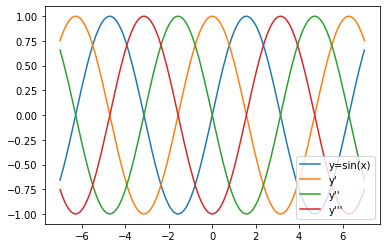

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from dezero import Variable
import dezero.functions as F

x = Variable(np.linspace(-7,7,200)) # -7~7 균일하게 200등분한 배열
y = F.sin(x)
y.backward(create_graph=True) # 1차 미분

logs = [y.data]

for i in range(3): # 2차 미분 ~ 
    logs.append(x.grad.data)
    gx = x.grad
    x.cleargrad()
    gx.backward(create_graph=True)
    
# 그래프 그리기
labels = ["y=sin(x)", "y'", "y''", "y'''"]
for i, v in enumerate(logs):
    plt.plot(x.data, logs[i], label=labels[i])
plt.legend(loc='lower right')
plt.show()

DeZero 함수는 다차원 배열을 입력받으면 각 원소에 대해 독립적으로 계산함  

# 35단계 고차 미분 계산 그래프

__tanh(쌍콕탄젠트 혹은 하이퍼볼릭 탄젠트) 함수 구현__   
  
이 함수도 dezero/functions.py에 추가

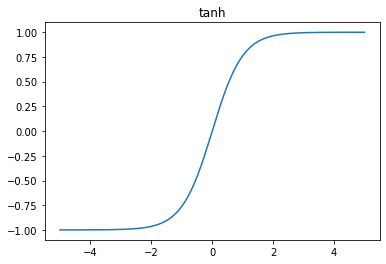

In [8]:
x = np.linspace(-5,5,200)
y = np.tanh(x)
plt.plot(x,y)
plt.title('tanh')
plt.show()

$y=tanh(x)=\frac{e^x-e^{-x}}{e^x+e^{-x}}$  
  
tanh 함수는 위의 그래프와 같이 입력을 -1 ~ 1 사이의 값으로 변환함  
  
tanh 함수의 미분은 다음의 미분 공식을 이용해 계산함  
  
$\{\frac{f(x)}{g(x)}\}'=\frac{f'(x)g(x)-f(x)g'(x)}{g(x)^2}$  
  
자연로그의 밑($e$)는 다음과 같음
- $\frac{\partial{e^x}}{\partial{x}}=e^x$
- $\frac{\partial{e^{-x}}}{\partial{x}}=e^{-x}$  
  
따라서 tanh 함수의 미분은 다음과 같음  
  
$\frac{\partial{tanh(x)}}{\partial{x}}=
\frac{(e^x+e^{-x})(e^x+e^{-x})-(e^x-e^{-x})(e^x-e^{-x})}{(e^x+e^{-x})^2}\\
=1-\frac{(e^x-e^{-x})(e^x-e^{-x})}{(e^x+e^{-x})^2}\\
=1-\{\frac{(e^x-e^{-x})}{(e^x+e^{-x})}\}^2\\
=1-tanh(x)^2\\
=1-y^2$  
  
따라서 $y=tanh(x)$일 때 미분값은 $1-y^2$

In [9]:
class Tanh(Function):
    def forward(self, x):
        y = np.tanh(x)
        return y
    
    def backward(self, gy):
        y = self.outputs[0]()
        gx = gy * (1 - y * y)
        return gx
    
def tanh(x):
    return Tanh()(x)

__고차 미분 계산 그래프 시각화__  
  


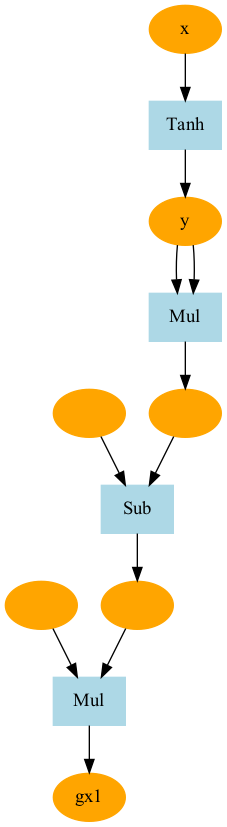

In [10]:
import numpy as np
from dezero import Variable
from dezero.utils import plot_dot_graph
import dezero.functions as F

x = Variable(np.array(1.0))
y = F.tanh(x)
x.name = 'x'
y.name = 'y'
y.backward(create_graph=True)

iters = 0 # 1차 미분만 실행함

for i in range(iters):
    gx = x.grad
    x.cleargrad()
    gx.backward(create_graph=True)
    
# 계산 그래프 그리기
gx = x.grad
gx.name = 'gx' + str(iters + 1)
plot_dot_graph(gx, verbose=False, to_file='tanh.png')

tanh 함수 고차 미분의 계산 그래프

In [12]:
import numpy as np
from dezero import Variable
from dezero.utils import plot_dot_graph
import dezero.functions as F

x = Variable(np.array(1.0))
y = F.tanh(x)
x.name = 'x'
y.name = 'y'
y.backward(create_graph=True)

iters = 7
gx = x.grad

for i in range(iters):
    x.cleargrad()
    gx.backward(create_graph=True)
    gx.name = 'gx' + str(iters + 1)    
    # 계산 그래프 그리기
    plot_dot_graph(gx, verbose=False, to_file='tanh_{}.png'.format(i+2))
    gx = x.grad

__2차 미분 계산 그래프__  
  
<img src='./img/3/tanh_2.png' width=80, height=500>

__3차 미분 계산 그래프__  
  
<img src='./img/3/tanh_3.png' width=130, height=500>

__4차 미분 계산 그래프__  
  
<img src='./img/3/tanh_4.png' width=230, height=500>

__5차 미분 계산 그래프__  
  
<img src='./img/3/tanh_5.png' width=330, height=500>

__6차 미분 계산 그래프__  
  
<img src='./img/3/tanh_6.png' width=600, height=500>

__7차 미분 계산 그래프__  
  
<img src='./img/3/tanh_7.png' width=800, height=500>

__8차 미분 계산 그래프__  
  
<img src='./img/3/tanh_8.png' width=800, height=500>

# 36단계 고차 미분 이외의 용도

새로운 DeZero는 역전파로 수행한 계산에 대해 또 다시 역전파할 수 있음  
이를 double backpropagation이라고 함  

__double backpropagation 계산__  
  
ex) 문제 : 다음의 두 식이 주어졌을 때 $x=2.0$에서 $x$에 대한 $z$의 미분 $\frac{\partial{z}}{\partial{x}}$를 구하라.  
  
$y=x^2$  
  
$z=(\frac{\partial{y}}{\partial{x}})^3+y$  
  
이 문제는 이미 미분이 포함된 식에서 다시 한 번 미분해야 함  
double backprop으로 계산할 수 있음  
  
이문제의 답은 다음과 같음  
  
$\frac{\partial{y}}{\partial{x}}=2x$  
  
$z=(\frac{\partial{y}}{\partial{x}})^3+y=8x^3+x^2$  
  
$\frac{\partial{z}}{\partial{x}}=24x^2+2x$  
  
식을 위와 같이 전개한 후 $24x^2+2x$에 $x=2.0$을 대입하면 100.0이라는 답이 나옴  
  
이를 DeZero를 사용해 풀면 다음과 같음

In [13]:
import numpy as np
from dezero import Variable

x = Variable(np.array(2.0))
y = x ** 2
y.backward(create_graph=True)
gx = x.grad
x.cleargrad()

z = gx ** 3 + y
z.backward()
print(x.grad)

variable(100.0)


double backprop은 WGAN-GP, MAML과 TRPO 등 다양한 연구에서 사용되고 있음  

# 뉴턴 방법과 double backprop 보충 학습

__다변수 함수의 뉴턴 방법__  
  
입력이 벡터 x=(x$_1$,x$_2,\cdots$,x$_n$)형태로 n개의 원소를 갖는 다차원 배열일 경우  
  
$y=f($x$)$에 대한 뉴턴 방법은 다음과 같음  
  
$x\leftarrow x-[\nabla^2 f($x$)]^{-1}\nabla f($x$)$  
  
여기서, $\nabla f($x$)$는 기울기를 나타냄  
기울기는 x의 각 원소에 대한 미분으로, 원소까지 표기하면 다음과 같음  
  
$\nabla f($x$)=\begin{pmatrix}
  \frac{\partial{f}}{\partial{x_1}}\\
  \frac{\partial{f}}{\partial{x_2}}\\
  \vdots \\
  \frac{\partial{f}}{\partial{x_n}}
 \end{pmatrix}$  
   
$\nabla ^2f($x$)$는 헤세 행렬(Hessian matrix)이며 다음과 같음  
  
$\nabla ^2f($x$)=$ $\begin{pmatrix}
  \frac{{\partial}^2{f}}{\partial{x_1^2}} & \frac{{\partial}^2{f}}{\partial{x_1}\partial{x_2}} & \cdots & \frac{{\partial}^2{f}}{\partial{x_1}\partial{x_n}}\\
  \frac{{\partial}^2{f}}{\partial{x_2}\partial{x_1}} & \frac{{\partial}^2{f}}{\partial{x_2^2}} & \cdots & \frac{{\partial}^2{f}}{\partial{x_2}\partial{x_n}}\\
  \vdots & \vdots & \ddots & \vdots \\ 
  \frac{{\partial}^2{f}}{\partial{x_n}\partial{x_1}} & \frac{{\partial}^2{f}}{\partial{x_n}\partial{x_2}} & \cdots & \frac{{\partial}^2{f}}{\partial{x_n^2}}
 \end{pmatrix}$  
   
이와 같이 헤세 행렬은 x의 두 원소에 대한 미분임  
  
\* 기울기 $\nabla f($x$)$는 $\frac{\partial{f}}{\partial{x}}$, 헤세 행렬 $\nabla ^2f($x$)=$는 $\frac{{\partial}^2{f}}{\partial{x}\partial{x^T}}$라고 표기할 수 있음  
  
위에서 제시한 식 $x\leftarrow x-[\nabla^2 f($x$)]^{-1}\nabla f($x$)$ 은 x를 기울기 방향으로 갱신하고 그 진행 거리를 헤세 행렬의 역행렬을 사용하여 조정함  
헤세 행렬이라는 2차 미분 정보를 이용함으로써 목적지에 더 빠르게 도달할 수 있음  
하지만 헤세 행렬은 역행렬 계산에 자원이 너무 많이 소모되므로 머신러닝과 딥러닝에서 잘 사용되지 않음  
  
따라서 대안들이 제안되고 있는데 대표적인 예로는 준 뉴턴방법(Quasi-Newton Method, QNM)이 있음  
이는 헤세 해열의 역행렬을 근사해 사용하는 방법의 총칭임  
준 뉴턴 방법 중 유명한 방법으로 L-BFGS있는데, 이는 기울기만으로 헤세 행렬을 근사함. 근사값을 구하여 계산 비용과 메모리 공간을 절약함  
  
하지만 지금까지의 딥러닝 분야에서 주류는 기울기만을 사용한 최적화(SGD, Momentum, Adam 등)임

__double backprop의 용도 : 헤세 행렬과 벡터의 곱__  
  
헤세 행렬과 벡터의 곱의 '결과'만 필요하다면 double backprop을 사용해 효율적으로 구할 수 있음  
  
  
예를 들어, $y=f(x)$와 임의의 n차원 벡터 $v$에서 헤세 행렬은 $\nabla ^2f(x)$  
헤세 행렬$\nabla ^2f(x)$과 벡터$v$의 곱을 구하면 다음과 같음  
<br>  
$\nabla ^2f(x)v=\begin{pmatrix}
  \frac{{\partial}^2{f}}{\partial{x_1^2}} & \frac{{\partial}^2{f}}{\partial{x_1}\partial{x_2}} \\
  \frac{{\partial}^2{f}}{\partial{x_2}\partial{x_1}} & \frac{{\partial}^2{f}}{\partial{x_2^2}}
 \end{pmatrix}\begin{pmatrix}v_1\\v_2\end{pmatrix}\\
 =\begin{pmatrix}
  \frac{{\partial}^2{f}}{\partial{x_1^2}}v_1+\frac{{\partial}^2{f}}{\partial{x_1}\partial{x_2}}v_2 \\
\frac{{\partial}^2{f}}{\partial{x_2}\partial{x_1}}v_1+\frac{{\partial}^2{f}}{\partial{x_2^2}}v_2
 \end{pmatrix}$  
<br>
 $\nabla (v^T\nabla f(x))\\
 =\nabla (\begin{pmatrix}v_1 & v_2\end{pmatrix})\\
 =\nabla (\frac{\partial{f}}{\partial{x_1}}v_1+\frac{\partial{f}}{\partial{x_2}}v_2)\\
 =\begin{pmatrix}
 \frac{{\partial}^2{f}}{\partial{x_1^2}}v_1+\frac{{\partial}^2{f}}{\partial{x_1}\partial{x_2}}v_2\\
 \frac{{\partial}^2{f}}{\partial{x_2}\partial{x_1}}v_1+\frac{{\partial}^2{f}}{\partial{x_2}^2}v_2\end{pmatrix}$  
<br>  
따라서 정리하면 다음과 같음  
  
$\nabla ^2f(x)v=\nabla (v^T\nabla f(x))$  
  
벡터 v와 기울기 $\nabla f(x)$의 곱, 즉 벡터의 내적을 먼저 구하고, 그 결과로부터 다시 한 번 기울기를 구함  
따라서 헤세 행렬을 만들지 않아도 되므로 계산 효율이 좋음  

DeZero에서 헤세 행렬과 벡터의 곱을 구하는 예시  
참고로 행렬 곱을 수행하는 F.matmul 함수는 뒤에서 구현할 예정  
  
~~~python
import numpy as np
from dezero import Variable
import dezero.functions as F

x = Variable(np.array([1.0, 2.0]))
v = Variable(np.array([4.0, 5.0]))

def f(x):
    t = x ** 2
    y = F.sum(t)
    return y

y = f(x)
y.backward(create_graph=True)

gx = x.grad
x.cleargrad()

z = F.matmul(v, gx)
z.backward()
print(x.grad)
~~~